## Machine Failure Prediction

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Importing all the packages

In [2]:
# To read the dataset, and perform basic data quality checks
import pandas as pd

# To preprocess the X data using pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# To perform train test split
from sklearn.model_selection import train_test_split

# To perform model selection
from sklearn.linear_model import LogisticRegression

# To plot confusion matrix and classification report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

## Read the dataset

In [3]:
df = pd.read_csv('/kaggle/input/machine-failure-prediction-iti-data-science/train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


<Axes: xlabel='Machine failure'>

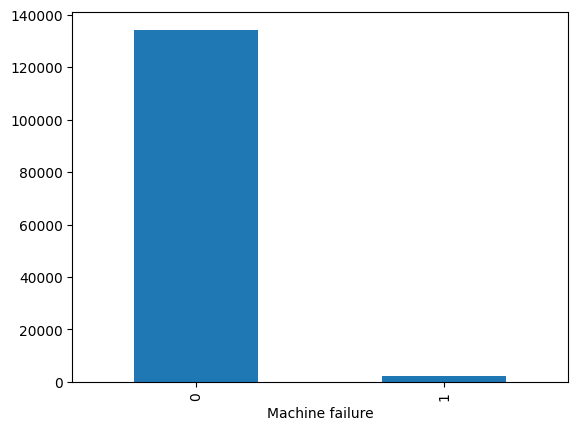

In [4]:
df['Machine failure'].value_counts().plot(kind='bar')

## Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df.shape

(136429, 14)

## Feature Engineering
### Data Cleaning
    Remove insignificant columns
    Data Conversion as per the requirement
### Data Preprocessing

##### Remove statistically insignificant columns

In [7]:
df.drop(columns=['id',],inplace=True)

In [8]:
# Product ID has Type details attached to it. Let's remove those details
df['Product ID'] = df['Product ID'].str.strip('L') 
df['Product ID'] = df['Product ID'].str.strip('M') 
df['Product ID'] = df['Product ID'].str.strip('H')
# convert product id into interger
df['Product ID'] = df['Product ID'].astype(int)
df['Product ID']

0         50096
1         20343
2         49454
3         53355
4         24050
          ...  
136424    22284
136425    38017
136426    54690
136427    53876
136428    47937
Name: Product ID, Length: 136429, dtype: int64

In [9]:
df['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [10]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [11]:
df.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [12]:
df.duplicated().sum()

1134

In [13]:
# % of overall duplicated rows
(df.duplicated().sum())/len(df)

0.00831201577377244

In [14]:
# Let's drop the duplicates
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

## Separate X and Y variables. X-Indepdent variables, Y -Dependent variable

In [16]:
X = df.drop(columns=['Machine failure'])
Y = df[['Machine failure']]

In [17]:
X.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [18]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [19]:
# Separate categorical and continouos features for encoding and scaling of data
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [20]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [21]:
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [22]:
pre = ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [23]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Product ID', 'Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [24]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Product ID,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.455430,0.395634,-0.246272,0.545724,-0.499466,0.557269,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0
1,-1.649926,1.469374,1.558865,1.721407,-1.323713,1.495570,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,0.0,1.0
2,0.410001,-0.302297,-1.040532,2.053195,-1.629862,-1.241141,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0
3,0.686040,0.610382,0.692399,0.026404,0.466080,1.448655,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0
4,-1.387614,-1.000229,-0.679505,0.870299,-0.581891,-1.100396,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,0.0,1.0


## Perform Train Test Split to divide the dataset into 75% training and 25% testing

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,train_size=0.75,test_size=0.25,random_state=21)

In [26]:
xtrain.shape

(101471, 14)

In [27]:
xtest.shape

(33824, 14)

In [28]:
ytrain.shape

(101471, 1)

In [29]:
ytest.shape

(33824, 1)

## Build the model

In [30]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
model.score(xtrain,ytrain)

0.9961663923682629

In [32]:
model.score(xtest,ytest)

0.9962157048249763

## Model Evaluation

In [33]:
preds = model.predict(xtest)
preds[:5]

array([0, 0, 0, 0, 0])

In [34]:
ytest.head()

,Machine failure
17484,0
68919,0
22775,0
33252,0
24428,0


In [35]:
probs = model.predict_proba(xtest)
probs

array([[0.99813339, 0.00186661],
       [0.99650155, 0.00349845],
       [0.99651596, 0.00348404],
       ...,
       [0.99719588, 0.00280412],
       [0.99743947, 0.00256053],
       [0.99494459, 0.00505541]])

In [36]:
prob_failure = probs[:,1]
prob_failure

array([0.00186661, 0.00349845, 0.00348404, ..., 0.00280412, 0.00256053,
       0.00505541])

### Plot the confusion matrix

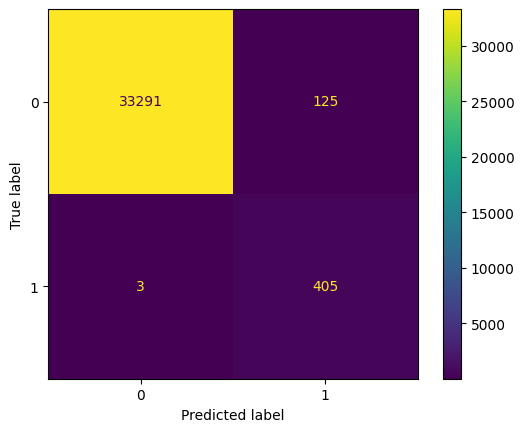

In [37]:
cf = confusion_matrix(preds,ytest)
ConfusionMatrixDisplay(cf,display_labels=model.classes_).plot()

### Print the classification report

In [38]:
print(classification_report(preds,ytest,labels=model.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33416
           1       0.76      0.99      0.86       408

    accuracy                           1.00     33824
   macro avg       0.88      0.99      0.93     33824
weighted avg       1.00      1.00      1.00     33824



We can observe that f1-score macro avg is 93% and accuracy is 100%. This is a good model. We can consider this model for final prediction

## Plot area under the ROC curve

In [39]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

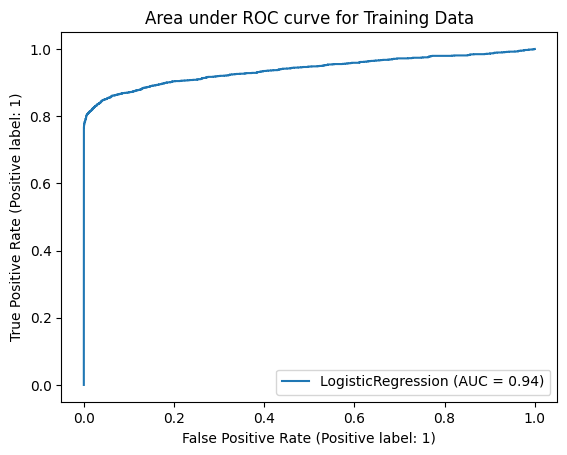

In [40]:
RocCurveDisplay.from_estimator(model,xtrain,ytrain)
plt.title('Area under ROC curve for Training Data')
plt.show()

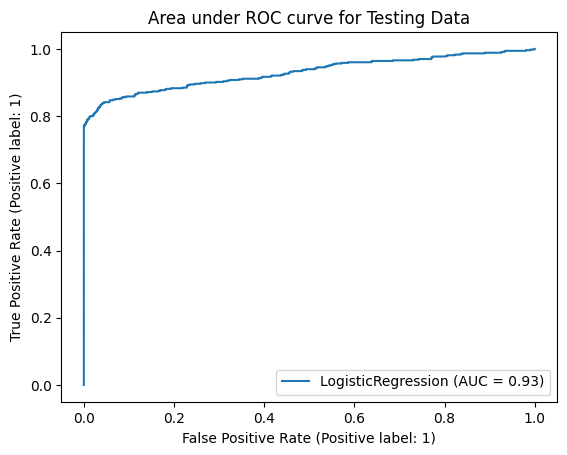

In [41]:
RocCurveDisplay.from_estimator(model,xtest,ytest)
plt.title('Area under ROC curve for Testing Data')
plt.show()

In [42]:
from sklearn.metrics import roc_curve

In [43]:
def plot_roc_curve(ytrue,ypred):

    fpr,tpr,threshold = roc_curve(ytest,preds)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

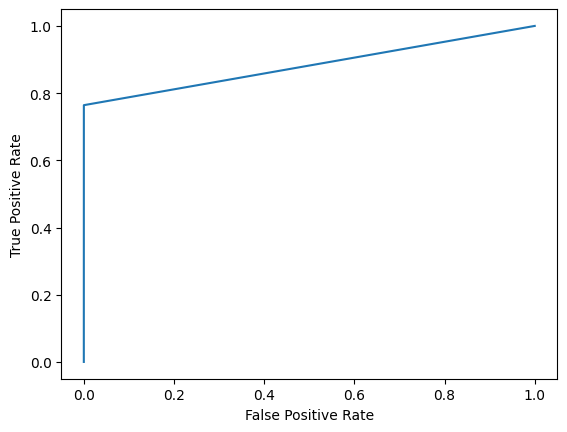

In [44]:
plot_roc_curve(ytest,probs)

## Load the test dataset and predict the machine failure result

In [45]:
xnew = pd.read_csv('/kaggle/input/machine-failure-prediction-iti-data-science/test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0


In [46]:
ml_df = xnew[['id']]
ml_df

,id
0,0
1,1
2,2
3,3
4,4
...,...
9995,9995
9996,9996
9997,9997
9998,9998


In [47]:
xnew.drop(columns=['id'],inplace=True)

In [48]:
# Product ID has Type details attached to it. Let's remove those details
xnew['Product ID'] = xnew['Product ID'].str.strip('L') 
xnew['Product ID'] = xnew['Product ID'].str.strip('M') 
xnew['Product ID'] = xnew['Product ID'].str.strip('H')
# convert product id into interger
xnew['Product ID'] = xnew['Product ID'].astype(int)
xnew['Product ID']

0       14860
1       47181
2       47182
3       47183
4       47184
        ...  
9995    24855
9996    39410
9997    24857
9998    39412
9999    24859
Name: Product ID, Length: 10000, dtype: int64

In [49]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Product ID,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,-2.037909,-0.946542,-0.968327,0.221149,0.289455,-1.632100,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,0.0,1.0
1,0.249161,-0.892855,-0.896121,-0.810279,0.701579,-1.585185,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0
2,0.249232,-0.946542,-1.040532,-0.161129,1.066602,-1.553908,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0
3,0.249303,-0.892855,-0.968327,-0.629959,-0.099118,-1.522631,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0
4,0.249373,-0.892855,-0.896121,-0.810279,-0.040243,-1.491354,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.0,1.0,0.0


In [50]:
new_probs = model.predict_proba(xnew_pre)
new_probs[:5]

array([[9.98455694e-01, 1.54430576e-03],
       [9.97996232e-01, 2.00376755e-03],
       [9.95653438e-01, 4.34656212e-03],
       [9.99099142e-01, 9.00857979e-04],
       [9.99131440e-01, 8.68560461e-04]])

In [51]:
machine_failure_probs = new_probs[:,1]
machine_failure_probs

array([0.00154431, 0.00200377, 0.00434656, ..., 0.00085243, 0.00336874,
       0.00131613])

In [52]:
ml_df['Machine failure'] = machine_failure_probs
ml_df

,id,Machine failure
0,0,0.001544
1,1,0.002004
2,2,0.004347
3,3,0.000901
4,4,0.000869
...,...,...
9995,9995,0.000412
9996,9996,0.000758
9997,9997,0.000852
9998,9998,0.003369


In [53]:
ml_df['Machine failure'].value_counts()

Machine failure
0.001544    1
0.002011    1
0.012975    1
0.004443    1
0.004858    1
           ..
0.005958    1
0.001529    1
0.002343    1
0.002301    1
0.001316    1
Name: count, Length: 10000, dtype: int64

In [54]:
ml_df.to_csv('submission.csv',index=False)